![Weather_photo](https://mms.businesswire.com/media/20170809006247/en/606322/22/NASA-hurricane-katrina-NASA-20050828.jpg)
image credit: NASA Hurricane Katrina

# Hurricane Katrina

In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt # Plotting library
import pandas as pd
import numpy as np
import requests
import datetime
import sys
# Import API key
from api_keys import noaa_key
print("All necessary libraries installed")

All necessary libraries installed


### Hurricane Katrina the costliest storm in U.S. history, made landfall off the coast of Louisiana on August 29, 2005. An estimated 1,833 people died in the hurricane and the flooding that followed in late August 2005, and millions of others were left homeless along the Gulf Coast and in New Orleans.Katrina was the most destructive storm to strike the United States and the costliest storm in U.S. history, causing 108 billion dollars in damage. It ranks sixth overall in strength of recorded Atlantic hurricanes.

### Katrina first formed as a tropical depression in Caribbean waters near the Bahamas on August 23, 2005. 

### Location id:  Louisiana ("FIPS:22")

### Dataset id: "GHCND" (name: "Daily Summaries")

![Katrina path](Images/katrina_track.png)

In [2]:
import json
# Let's get fetch all the stations near Palequemines parish, LA
mytoken = noaa_key
location_id = "FIPS:22"
dataset_id = "GHCND"
zipcodes = ["ZIP:70041","ZIP:70072","ZIP:70354","ZIP:70085","ZIP:70345","ZIP:70301","ZIP:70380","ZIP:70086"]
# Define base url to get weather summaries
base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?"
# Let's create a list to hold the responses from API call
station_id = []
station_name = []
latitude = []
longitude = []
for zipcode in zipcodes:
    # Create a query_url
    query_url = base_url+"datasetid=GHCND"+"&"+"locationid="+str(zipcode)+"&"+"limit=800"
    # Create the request query
    response = requests.get(query_url, headers = {"token":mytoken})
    # Print the response url 
    print('\033[1m'+"Zipcode :{}".format(zipcode)+'\033[0m')
    print("Request status code: "+str(response.status_code))
    response_json = response.json()
    # Let's fill the dictionaries from the response file
    for i in range(len(response_json["results"])):
        try:
            station_id.append(response_json["results"][i]["id"])
            station_name.append(response_json["results"][i]["name"])
            latitude.append(response_json["results"][i]["latitude"])
            longitude.append(response_json["results"][i]["longitude"])
            # Handle exceptions for data not found in the response file
        except(KeyError, ValueError):
            # Print error message
            print("Index {} : Data Not found ! Skipping..".format(i))
            pass

Zipcode :ZIP:70041
Request status code: 200
Zipcode :ZIP:70072
Request status code: 200
Zipcode :ZIP:70354
Request status code: 200
Zipcode :ZIP:70085
Request status code: 200
Zipcode :ZIP:70345
Request status code: 200
Zipcode :ZIP:70301
Request status code: 200
Zipcode :ZIP:70380
Request status code: 200
Zipcode :ZIP:70086
Request status code: 200


## Creating a dataframe from the response

In [3]:
# Let's create a DataFrame with the lists
df_NOLAStations = pd.DataFrame({
    "Station id": station_id,
    "Station name": station_name,
    "Latitude": latitude,
    "Longitude": longitude
})
print('\033[1m'+"The shape of the {} dataframe is: {}" .format("df_NOLAStations",df_NOLAStations.shape)+'\033[0m')
df_NOLAStations.head() # Display the DataFrame

The shape of the df_NOLAStations dataframe is: (19, 4)


,Station id,Station name,Latitude,Longitude
0,GHCND:USC00161292,"BURAS, LA US",29.34139,-89.51583
1,GHCND:USC00162884,"EMPIRE, LA",29.40000,-89.60000
2,GHCND:USW00012884,"BOOTHVILLE ASOS, LA US",29.33300,-89.40750
3,GHCND:US1LAJF0006,"MARRERO 1.9 E, LA US",29.88070,-90.08370
4,GHCND:USC00164624,"MARRERO 9 SSW, LA US",29.78520,-90.11580


In [4]:
# Let's create a list of stations 
lNOLAStations = pd.Series(df_NOLAStations["Station id"])

In [5]:
import json
# Let's get fetch data from all the stations in Plaquemines Parish, LA
mytoken = noaa_key
location_id = "FIPS:22"
dataset_id = "GHCND"
zipcodes = ["ZIP:70041","ZIP:70072","ZIP:70354","ZIP:70085","ZIP:70345","ZIP:70301","ZIP:70380","ZIP:70086"]
start_date = "2005-08-24"
end_date = "2005-09-04"
# Define base url to get weather summaries
base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?"
# Let's create a list of dictionaries
weather_data = []
# Display the start of Data Retrieval
#print(f"****** Beginning Data Retrieval *********")
# Let's fill the dictionaries from the response file
for zipcode in zipcodes:
    # Create a query_url
    query_url = base_url+"datasetid="+str(dataset_id)+"&"+"locationid="+str(zipcode)+"&"+"startdate="+str(start_date)+"&"+"enddate="+str(end_date)+"&"+"limit=800"+"&"+"units=standard"
    # Create the request query
    response = requests.get(query_url, headers = {"token":mytoken})
    # Print the response url 
    print('\033[1m'+"Zipcode :{}".format(zipcode)+'\033[0m')
    print("Request status code: "+str(response.status_code))
    response_json = response.json()
    if len(response_json["results"]) != 0:
        for i in range(len(response_json["results"])):
            try:
                datatype = response_json["results"][i]["datatype"]
                date = response_json["results"][i]["date"]
                station = response_json["results"][i]["station"]
                value = response_json["results"][i]["value"]
                weather_data.append({"DataType":datatype,
                                    "Date":date,
                                    "Station id":station,
                                    "Value":value})
            # Handle exceptions for data not found in the response file
            except(KeyError, ValueError):
            # Print error message
                print("Index {} : Data Not found ! Skipping..".format(i))
            pass
    else:
        continue
        
#print(f"****** Data Retrieval Complete **********")

Zipcode :ZIP:70041
Request status code: 200
Zipcode :ZIP:70072
Request status code: 200
Zipcode :ZIP:70354
Request status code: 200
Zipcode :ZIP:70085
Request status code: 200
Zipcode :ZIP:70345
Request status code: 200
Zipcode :ZIP:70301
Request status code: 200
Zipcode :ZIP:70380
Request status code: 200
Zipcode :ZIP:70086
Request status code: 200


### Creating a DataFrame from the json response

In [6]:
# Let's create a DataFrame with the lists
df_weather = pd.DataFrame(weather_data)
print('\033[1m'+"The shape of the {} dataframe is: {}" .format("df_weather",df_weather.shape)+'\033[0m')
df_weather.head() # Display the DataFrame

The shape of the df_weather dataframe is: (398, 4)


,DataType,Date,Station id,Value
0,PRCP,2005-08-24T00:00:00,GHCND:USC00161292,0.08
1,TMAX,2005-08-24T00:00:00,GHCND:USC00161292,91.00
2,TMIN,2005-08-24T00:00:00,GHCND:USC00161292,72.00
3,TOBS,2005-08-24T00:00:00,GHCND:USC00161292,82.00
4,AWND,2005-08-24T00:00:00,GHCND:USW00012884,3.10


In [7]:
# Let's create a list of stations 
LWeatherStations = pd.Series(df_weather["Station id"])

### Any common station between two lists ?

In [8]:
def common_member (x,y):
    x_set = set(x)
    y_set = set(y)
    if len(x_set.intersection(y_set))>0:
        return(True)
    return(False)
print('\033[1m'+"Are there common stations between lists? {}" .format(common_member(LWeatherStations,lNOLAStations))+'\033[0m')

Are there common stations between lists? True


In [9]:
x_set = set(LWeatherStations)
y_set = set(lNOLAStations)
print('\033[1m'+"Number of stations without geo-cordinates: {}" .format(len(x_set-y_set))+'\033[0m')
print('\033[1m'+"Stations without geo-cordinates: {}" .format((x_set-y_set))+'\033[0m')

Number of stations without geo-cordinates: 0
Stations without geo-cordinates: set()


![Katrina devastation](Images/Sea_Temperature_Katrina.jpg)

## Creating a combined dataframe with geo coordinates

In [10]:
# Combine the dataframes into a single dataframe
df_NOLAWeather = pd.merge(df_weather, df_NOLAStations, how="inner", on="Station id")
# Using list comprehensions to remove the time stamp from Date
df_NOLAWeather["Date"] = [v[:-9] for v in df_NOLAWeather["Date"]]
# Display the Dataframe
print('\033[96m'+'\033[1m'+"The shape of the {} dataframe is {}:" .format("df_NOLAWeather",df_NOLAWeather.shape)+'\033[0m')
df_NOLAWeather.head()

The shape of the df_NOLAWeather dataframe is (522, 7):


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,PRCP,2005-08-24,GHCND:USC00161292,0.08,"BURAS, LA US",29.34139,-89.51583
1,TMAX,2005-08-24,GHCND:USC00161292,91.00,"BURAS, LA US",29.34139,-89.51583
2,TMIN,2005-08-24,GHCND:USC00161292,72.00,"BURAS, LA US",29.34139,-89.51583
3,TOBS,2005-08-24,GHCND:USC00161292,82.00,"BURAS, LA US",29.34139,-89.51583
4,PRCP,2005-08-25,GHCND:USC00161292,0.08,"BURAS, LA US",29.34139,-89.51583


In [11]:
# Let's see the unique datatypes in the final DataFrame
print(df_NOLAWeather["DataType"].unique().tolist())

['PRCP', 'TMAX', 'TMIN', 'TOBS', 'AWND', 'FMTM', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT13', 'WT16', 'SNOW', 'SNWD', 'MDPR', 'WT11', 'DAPR']


## Definition of the data types :
* PRCP  : Precipitation (mm or inches)
* SNOW  : Snowfall (mm or inches)
* SNWD : Snow depth (mm or inches)
* AWND  : Average Daily Wind Speed (meters per sec or miles per hr)
* TMAX  : Maximim Temperature (Fahrenheit or Celsius)
* TMIN  : Minimum Temperature (Fahrenheit or Celsius)
* TOBS  : Temperature at the time of observation (Fahrenheit or Celsius)
* WDF2  : Direction of fastest 2-min wind (degrees)
* WDF5  : Direction of fastest 5-sec wind (degrees)
* WSF2  : Fastest 1 min wind speed 
* WSF5  : Fastest 5 sec wind speed
* WT16  : Rain
* WT13  : Mist
* WT01  : Fog
* MDPR  : Multiday precipitation total (mm or inches)

## Let's see how many data points are available for each weather types

In [12]:
# Let's groupby data-type column in the dataframe and count the ocurrences
grouped_count = df_NOLAWeather["DataType"].groupby(df_NOLAWeather["DataType"]) # Create a GroupBy object
# Let's create a dataframe with the number of data points for each weather data type
weather_count_unsorted = grouped_count.count().to_frame("Count")
# Let's sort the dataframe by number of count
weather_count = weather_count_unsorted.sort_values(by="Count",ascending=False)
# Let's reset index in the new dataframe
weather_count.reset_index(inplace=True)
# Display the Dataframe
print('\033[96m'+'\033[1m'+"The shape of weather count dataframe is {}:" .format(weather_count.shape)+'\033[0m')
weather_count.head()

The shape of weather count dataframe is (18, 2):


,DataType,Count
0,SNWD,96
1,SNOW,96
2,PRCP,77
3,TMIN,72
4,TMAX,72


## Precipitation near Plaquemines parish when hurricane Katrina made landfall

In [13]:
# Let's create a precipitation dataframe
df_prcp_unsorted = df_NOLAWeather.loc[(df_NOLAWeather["DataType"]=="PRCP"),:]
# Let's sort the dataframe by Date
df_prcp = df_prcp_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_prcp.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_prcp.to_csv("Output_Data/Harvey_Prcp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the precipitation dataframe is:{}".format(df_prcp.shape)+'\033[0m')
df_prcp.head()

The shape of the precipitation dataframe is:(77, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,PRCP,2005-08-24,GHCND:USC00161292,0.08,"BURAS, LA US",29.34139,-89.51583
1,PRCP,2005-08-24,GHCND:USC00169013,0.00,"THIBODAUX 4 SE, LA US",29.75470,-90.77480
2,PRCP,2005-08-24,GHCND:USC00166394,0.02,"MORGAN CITY, LA US",29.68330,-91.17610
3,PRCP,2005-08-24,GHCND:USC00163433,0.00,"GALLIANO, LA US",29.46310,-90.30720
4,PRCP,2005-08-24,GHCND:USC00163433,0.00,"GALLIANO, LA US",29.46310,-90.30720


## Let's create maximum precipitation dataframe

In [14]:
# Let's groupby value column by date and count the maximum ocurrences
grouped_count = df_prcp["Value"].groupby(df_prcp["Date"]) # Create a GroupBy object
# Let's create a dataframe with maximum precipitation per day
df_prcp_max_unsorted = grouped_count.max().to_frame("Value")
# Let's sort the dataframe by date
df_prcp_max = df_prcp_max_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_prcp_max.reset_index(inplace=True)
# Save the dataframe to the output file
df_prcp_max.to_csv("Output_Data/Katrina_Prcp_max.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the max per day precipitation dataframe is:{}".format(df_prcp_max.shape)+'\033[0m')
df_prcp_max.head()

The shape of the max per day precipitation dataframe is:(12, 2)


,Date,Value
0,2005-08-24,0.08
1,2005-08-25,0.80
2,2005-08-26,0.08
3,2005-08-27,0.21
4,2005-08-28,0.00


## Maximum Temperature near Plaquemines parish when hurricane Katrina made landfall

In [15]:
# Let's create maximum temperature dataframe
df_MaxTemp_unsorted = df_NOLAWeather.loc[(df_NOLAWeather["DataType"]=="TMAX"),:]
# Let's sort the dataframe by Date
df_MaxTemp = df_MaxTemp_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_MaxTemp.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_MaxTemp.to_csv("Output_Data/Katrina_MaxTemp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the maximum temperature dataframe is:{}".format(df_MaxTemp.shape)+'\033[0m')
df_MaxTemp.head()

The shape of the maximum temperature dataframe is:(72, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,TMAX,2005-08-24,GHCND:USC00161292,91.0,"BURAS, LA US",29.34139,-89.51583
1,TMAX,2005-08-24,GHCND:USC00163433,94.0,"GALLIANO, LA US",29.46310,-90.30720
2,TMAX,2005-08-24,GHCND:USC00163433,94.0,"GALLIANO, LA US",29.46310,-90.30720
3,TMAX,2005-08-24,GHCND:USC00169013,95.0,"THIBODAUX 4 SE, LA US",29.75470,-90.77480
4,TMAX,2005-08-24,GHCND:USC00163433,94.0,"GALLIANO, LA US",29.46310,-90.30720


## Minimum Temperature near Plaquemines parish when hurricane Katrina made landfall

In [16]:
# Let's create minimum temperature dataframe
df_MinTemp_unsorted = df_NOLAWeather.loc[(df_NOLAWeather["DataType"]=="TMIN"),:]
# Let's sort the dataframe by Date
df_MinTemp = df_MinTemp_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_MinTemp.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_MinTemp.to_csv("Output_Data/Katrina_MinTemp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the minimum temperature dataframe is:{}".format(df_MinTemp.shape)+'\033[0m')
df_MinTemp.head()

The shape of the minimum temperature dataframe is:(72, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,TMIN,2005-08-24,GHCND:USC00161292,72.0,"BURAS, LA US",29.34139,-89.51583
1,TMIN,2005-08-24,GHCND:USC00163433,77.0,"GALLIANO, LA US",29.46310,-90.30720
2,TMIN,2005-08-24,GHCND:USC00163433,77.0,"GALLIANO, LA US",29.46310,-90.30720
3,TMIN,2005-08-24,GHCND:USC00169013,73.0,"THIBODAUX 4 SE, LA US",29.75470,-90.77480
4,TMIN,2005-08-24,GHCND:USC00163433,77.0,"GALLIANO, LA US",29.46310,-90.30720


### Average daily wind speed near Plaquemines parish when hurricane Katrina made landfall

In [17]:
# Let's create average daily windspeed dataframe
df_WndSpd_unsorted = df_NOLAWeather.loc[(df_NOLAWeather["DataType"]=="AWND"),:]
# Let's sort the dataframe by Date
df_WndSpd = df_WndSpd_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_WndSpd.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_WndSpd.to_csv("Output_Data/Katrina_AvgWindSpeed.csv", index=False, encoding="utf-8")
print('\033[94m'+'\033[1m'+"The shape of the daily wind speed dataframe is:{}".format(df_WndSpd.shape)+'\033[0m')
df_WndSpd.head()

The shape of the daily wind speed dataframe is:(5, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,AWND,2005-08-24,GHCND:USW00012884,3.1,"BOOTHVILLE ASOS, LA US",29.333,-89.4075
1,AWND,2005-08-25,GHCND:USW00012884,4.3,"BOOTHVILLE ASOS, LA US",29.333,-89.4075
2,AWND,2005-08-26,GHCND:USW00012884,6.9,"BOOTHVILLE ASOS, LA US",29.333,-89.4075
3,AWND,2005-08-27,GHCND:USW00012884,11.6,"BOOTHVILLE ASOS, LA US",29.333,-89.4075
4,AWND,2005-08-28,GHCND:USW00012884,18.8,"BOOTHVILLE ASOS, LA US",29.333,-89.4075


### Fastest 5 second windspeed near Plaquemines parish when hurricane Katrina made landfall

In [18]:
# Let's create fastest 5 second windspeed dataframe
df_WSF5_unsorted = df_NOLAWeather.loc[(df_NOLAWeather["DataType"]=="WSF5"),:]
# Let's sort the dataframe by Date
df_WSF5 = df_WSF5_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_WSF5.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_WSF5.to_csv("Output_Data/Katrina_5secWindSpeed.csv", index=False, encoding="utf-8")
print('\033[94m'+'\033[1m'+"The shape of the daily wind speed dataframe is:{}".format(df_WSF5.shape)+'\033[0m')
df_WSF5.head()

The shape of the daily wind speed dataframe is:(4, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,WSF5,2005-08-24,GHCND:USW00012884,17.0,"BOOTHVILLE ASOS, LA US",29.333,-89.4075
1,WSF5,2005-08-25,GHCND:USW00012884,19.9,"BOOTHVILLE ASOS, LA US",29.333,-89.4075
2,WSF5,2005-08-26,GHCND:USW00012884,21.0,"BOOTHVILLE ASOS, LA US",29.333,-89.4075
3,WSF5,2005-08-27,GHCND:USW00012884,23.0,"BOOTHVILLE ASOS, LA US",29.333,-89.4075


### Fastest 1 minute windspeed near Plaquemines parish when hurricane Katrina made landfall

In [19]:
# Let's create fastest 1 minute windspeed dataframe
df_WSF2_unsorted = df_NOLAWeather.loc[(df_NOLAWeather["DataType"]=="WSF2"),:]
# Let's sort the dataframe by Date
df_WSF2 = df_WSF2_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_WSF2.reset_index(drop = True, inplace=True)
# Save the dataframe to the output file
df_WSF2.to_csv("Output_Data/Katrina_1minWindSpeed.csv", index=False, encoding="utf-8")
print('\033[94m'+'\033[1m'+"The shape of the daily wind speed dataframe is:{}".format(df_WSF2.shape)+'\033[0m')
df_WSF2.head()

The shape of the daily wind speed dataframe is:(4, 7)


,DataType,Date,Station id,Value,Station name,Latitude,Longitude
0,WSF2,2005-08-24,GHCND:USW00012884,14.1,"BOOTHVILLE ASOS, LA US",29.333,-89.4075
1,WSF2,2005-08-25,GHCND:USW00012884,16.1,"BOOTHVILLE ASOS, LA US",29.333,-89.4075
2,WSF2,2005-08-26,GHCND:USW00012884,15.0,"BOOTHVILLE ASOS, LA US",29.333,-89.4075
3,WSF2,2005-08-27,GHCND:USW00012884,17.0,"BOOTHVILLE ASOS, LA US",29.333,-89.4075


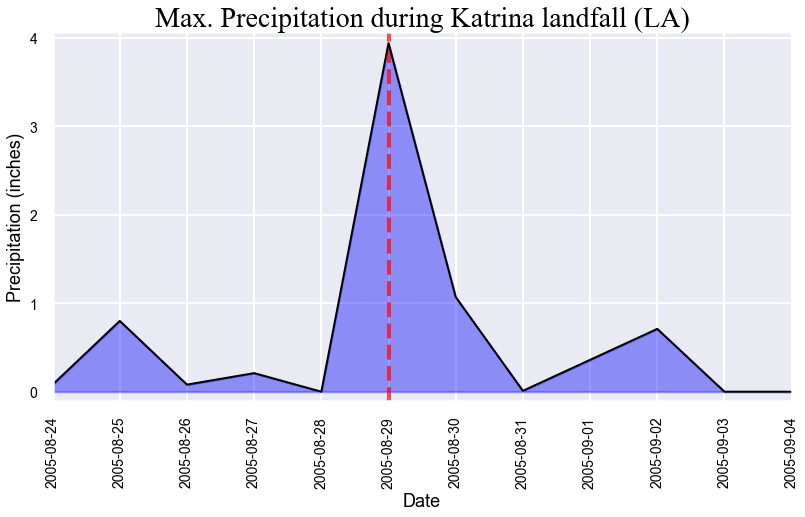

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=1.4,rc={"grid.linewidth":2})
# Define the figure size
fig = plt.figure(figsize=(12,8))
# Define x_data & y_data
x_data = df_prcp_max["Date"]
y_data = df_prcp_max["Value"]
# Make a color map
t = np.arange(len(y_data))
# Define x_axis for the plot
x_axis = np.arange(12)
# Define tick locations and place the x_ticks
tick_locations = [value for value in x_axis]
# Create the tick labels (unique days)
x_labels = df_prcp["Date"].unique().tolist()
plt.xticks(tick_locations,x_labels,rotation=90,fontsize=14,color="black",**labelfont)
# Set the x limits of the current chart
plt.xlim(0, len(x_axis)-1)
# Set y ticks and y limits of the current chart
plt.yticks(fontsize=14, color = "black", **labelfont)
# Creating padding around the y limits
y_pad = abs(0.2*y_data.mean()) # 20% of mean y value
# Sets the y limits of the current chart
plt.ylim(-0.1,y_data.max()+y_pad )
# Plotting the data
plt.plot(x_data,y_data,color="black",linewidth = 2)
plt.fill_between(x_data,y_data,color = "blue", alpha = 0.4)
# Creating a vertical line denoting the landfall date
plt.vlines("2005-08-29",(y_data.min()-y_pad),(y_data.max()+y_pad),color="red",alpha=0.7,linewidth=4,linestyle="dashed")
# Display x & y-axis labels and a title for the lineplot
plt.title("Max. Precipitation during Katrina landfall (LA)",fontsize=28,color="black",**titlefont)
plt.xlabel("Date",fontsize = 18,color="black",**labelfont)
plt.ylabel("Precipitation (inches)",fontsize = 18,color="black",**labelfont)
plt.tight_layout()
# Save the figure
plt.savefig("Output_Data/Max_Katrina_Precipitation.png")
# Display the plot
plt.show()

## Let's create total precipitation dataframe

In [21]:
# Let's groupby value column by date and count the maximum ocurrences
grouped_count = df_prcp["Value"].groupby(df_prcp["Date"]) # Create a GroupBy object
# Let's create a dataframe with maximum precipitation per day
df_prcp_sum_unsorted = grouped_count.sum().to_frame("Value")
# Let's sort the dataframe by date
df_prcp_sum = df_prcp_sum_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_prcp_sum.reset_index(inplace=True)
# Save the dataframe to the output file
df_prcp_sum.to_csv("Output_Data/Katrina_Prcp_total.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of total precipitation dataframe is:{}".format(df_prcp_sum.shape)+'\033[0m')
df_prcp_sum.head()

The shape of total precipitation dataframe is:(12, 2)


,Date,Value
0,2005-08-24,0.10
1,2005-08-25,1.83
2,2005-08-26,0.12
3,2005-08-27,0.49
4,2005-08-28,0.00


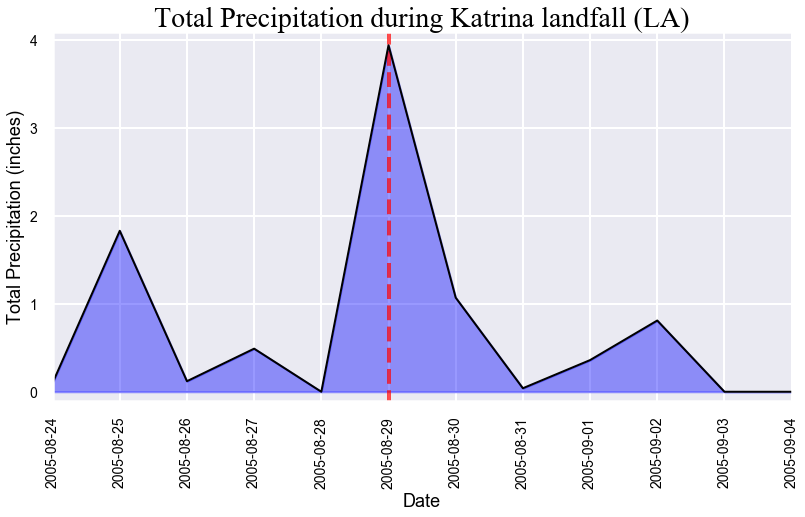

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=1.4,rc={"grid.linewidth":2})
# Define the figure size
fig = plt.figure(figsize=(12,8))
# Define x_data & y_data
x_data = df_prcp_sum["Date"]
y_data = df_prcp_sum["Value"]
# Make a color map
t = np.arange(len(y_data))
# Define x_axis for the plot
x_axis = np.arange(12)
# Define tick locations and place the x_ticks
tick_locations = [value for value in x_axis]
# Create the tick labels (unique days)
x_labels = df_prcp["Date"].unique().tolist()
plt.xticks(tick_locations,x_labels,rotation=90,fontsize=14,color="black",**labelfont)
# Set the x limits of the current chart
plt.xlim(0, len(x_axis)-1)
# Set y ticks and y limits of the current chart
plt.yticks(fontsize=14, color = "black", **labelfont)
# Creating padding around the y limits
y_pad = abs(0.2*y_data.mean()) # 20% of mean y value
# Sets the y limits of the current chart
plt.ylim(-0.1,y_data.max()+y_pad )
# Plotting the data
plt.plot(x_data,y_data,color="black",linewidth = 2)
plt.fill_between(x_data,y_data,color = "blue", alpha = 0.4)
# Creating a vertical line denoting the landfall date
plt.vlines("2005-08-29",(y_data.min()-y_pad),(y_data.max()+y_pad),color="red",alpha=0.7,linewidth=4,linestyle="dashed")
# Display x & y-axis labels and a title for the lineplot
plt.title("Total Precipitation during Katrina landfall (LA)",fontsize=28,color="black",**titlefont)
plt.xlabel("Date",fontsize = 18,color="black",**labelfont)
plt.ylabel("Total Precipitation (inches)",fontsize = 18,color="black",**labelfont)
plt.tight_layout()
# Save the figure
plt.savefig("Output_Data/Total_Katrina_Precipitation.png")
# Display the plot
plt.show()

## Let's create merged dataframe with minimum and maximum temperatures

In [23]:
# A copy of the minimum temperature dataframe with relevant colummns
df_min = df_MinTemp[["Date","Value"]]
# Let's groupby value column by date and count the minimum ocurrences
grouped_count = df_min["Value"].groupby(df_min["Date"]) # Create a GroupBy object
# Let's create a dataframe with minimum temperature per day
df_min_unsorted = grouped_count.min().to_frame("MinTemp")
# Let's sort the dataframe by date
df_min = df_min_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_min.reset_index(inplace=True)
# A copy of the maximum temperature dataframe with relevant colummns
df_max = df_MaxTemp[["Date","Value"]]
# Let's groupby value column by date and count the maximum ocurrences
grouped_count = df_max["Value"].groupby(df_max["Date"]) # Create a GroupBy object
# Let's create a dataframe with minimum temperature per day
df_max_unsorted = grouped_count.max().to_frame("MaxTemp")
# Let's sort the dataframe by date
df_max = df_max_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_max.reset_index(inplace=True)
# Combine the dataframes into a single dataframe
df_MinMax = pd.merge(df_max, df_min, how="outer", on="Date")
# Save the dataframe to the output file
df_MinMax.to_csv("Output_Data/Katrina_MinMax_Temp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the min-max temperature dataframe is:{}".format(df_MinMax.shape)+'\033[0m')
df_MinMax.head() # Display the dataframe

The shape of the min-max temperature dataframe is:(12, 3)


,Date,MaxTemp,MinTemp
0,2005-08-24,95.0,72.0
1,2005-08-25,94.0,75.0
2,2005-08-26,92.0,76.0
3,2005-08-27,94.0,75.0
4,2005-08-28,94.0,75.0


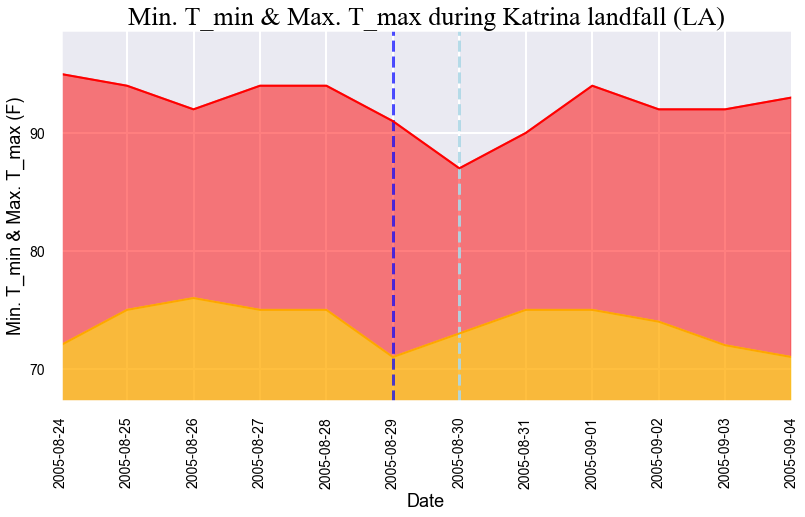

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=1.4,rc={"grid.linewidth":2})
# Define the figure size
fig = plt.figure(figsize=(12,8))
# Define x_data & y_data
x_data = df_MinMax["Date"]
y_max = df_MinMax["MaxTemp"]
y_min = df_MinMax["MinTemp"]
# Make a color map
t = np.arange(12)
# Define x_axis for the plot
x_axis = np.arange(12)
# Define tick locations and place the x_ticks
tick_locations = [value for value in x_axis]
# Create the tick labels (unique days)
x_labels = df_prcp["Date"].unique().tolist()
plt.xticks(tick_locations,x_labels,rotation=90,fontsize=14,color="black",**labelfont)
# Set the x limits of the current chart
plt.xlim(0, len(x_axis)-1)
# Creating padding around the x and y limits
y_pad = abs(0.05*y_min.mean()) # 12% of mean y value
# Sets the y limits of the current chart
plt.ylim(y_min.min()-y_pad,y_max.max()+y_pad )
# Set y ticks and y limits of the current chart
plt.yticks(fontsize=14, color = "black", **labelfont)
# Plot Maximum Temperature data
plt.plot(x_data,y_max,color="red",linewidth = 2)
# Plot Minimum Temperature data
plt.plot(x_data,y_min,color="orange",linewidth = 2)
# Filling the area below the line plots
plt.fill_between(x_data,y_max,color = "red", alpha = 0.5)
plt.fill_between(x_data,y_min,color = "yellow", alpha = 0.5)
# Creating a vertical line denoting the landfall date
plt.vlines("2005-08-29",(y_min.min()-y_pad),(y_max.max()+y_pad),color="blue",alpha=0.7,linestyle="dashed")
plt.vlines("2005-08-30",(y_min.min()-y_pad),(y_max.max()+y_pad),color="lightblue",alpha=0.9,linestyle="dashed")
# Display x & y-axis labels and a title for the lineplot
plt.title("Min. T_min & Max. T_max during Katrina landfall (LA)",fontsize=26,color="black",**titlefont)
plt.xlabel("Date",fontsize = 18,color="black",**labelfont)
plt.ylabel("Min. T_min & Max. T_max (F)",fontsize = 18,color="black",**labelfont)
plt.tight_layout()
# Save the figure
plt.savefig("Output_Data/Katrina_MinMaxTemp.png")
# Display the plot
plt.show()

## Let's create merged dataframe with average minimum and maximum temperatures

In [25]:
# A copy of the minimum temperature dataframe with relevant colummns
df_min_avg = df_MinTemp[["Date","Value"]]
# Let's groupby value column by date and count the minimum ocurrences
grouped_count = df_min_avg["Value"].groupby(df_min_avg["Date"]) # Create a GroupBy object
# Let's create a dataframe with minimum temperature per day
df_min_unsorted = grouped_count.mean().to_frame("Min_Avg_Temp")
# Let's sort the dataframe by date
df_min_avg = df_min_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_min_avg.reset_index(inplace=True)
# A copy of the maximum temperature dataframe with relevant colummns
df_max_avg = df_MaxTemp[["Date","Value"]]
# Let's groupby value column by date and count the maximum ocurrences
grouped_count = df_max_avg["Value"].groupby(df_max_avg["Date"]) # Create a GroupBy object
# Let's create a dataframe with minimum temperature per day
df_max_unsorted = grouped_count.mean().to_frame("Max_Avg_Temp")
# Let's sort the dataframe by date
df_max_avg = df_max_unsorted.sort_values(by="Date",ascending=True)
# Let's reset index in the new dataframe
df_max_avg.reset_index(inplace=True)
# Combine the dataframes into a single dataframe
df_MinMax_avg = pd.merge(df_max_avg, df_min_avg, how="outer", on="Date")
# Save the dataframe to the output file
df_MinMax_avg.to_csv("Output_Data/Katrina_AvgMinMax_Temp.csv", index=False, encoding="utf-8")
# Display the dataframe
print('\033[94m'+'\033[1m'+"The shape of the average min-max temperature dataframe is:{}".format(df_MinMax_avg.shape)+'\033[0m')
df_MinMax_avg.head() # Display the dataframe

The shape of the average min-max temperature dataframe is:(12, 3)


,Date,Max_Avg_Temp,Min_Avg_Temp
0,2005-08-24,93.555556,75.777778
1,2005-08-25,92.333333,77.666667
2,2005-08-26,90.555556,78.111111
3,2005-08-27,92.000000,78.375000
4,2005-08-28,91.142857,78.142857


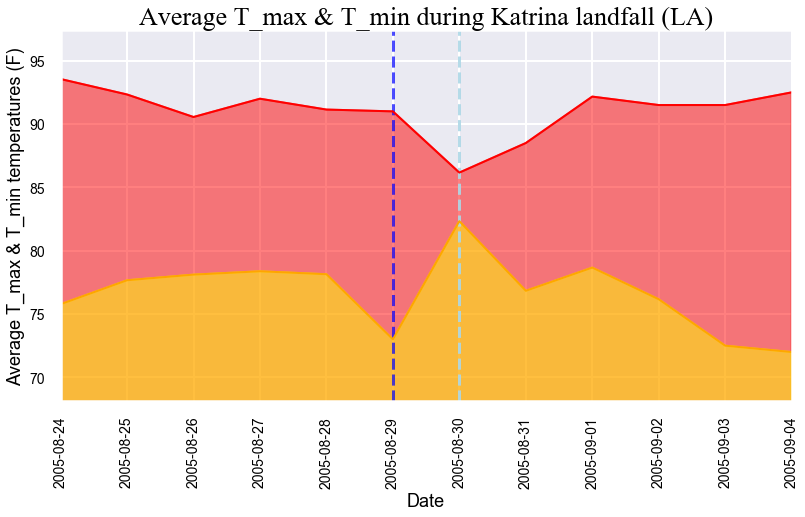

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Set the style for seaborn plot
sns.set_style("darkgrid")
# Create a font library
titlefont = {"fontname":"Times New Roman"}
labelfont = {"fontname":"Arial"}
# Set font scale and reduce grid line width
sns.set_context("poster",font_scale=1.4,rc={"grid.linewidth":2})
# Define the figure size
fig = plt.figure(figsize=(12,8))
# Define x_data & y_data
x_data = df_MinMax_avg["Date"]
y_max = df_MinMax_avg["Max_Avg_Temp"]
y_min = df_MinMax_avg["Min_Avg_Temp"]
# Make a color map
t = np.arange(12)
# Define x_axis for the plot
x_axis = np.arange(12)
# Define tick locations and place the x_ticks
tick_locations = [value for value in x_axis]
# Create the tick labels (unique days)
x_labels = df_prcp["Date"].unique().tolist()
plt.xticks(tick_locations,x_labels,rotation=90,fontsize=14,color="black",**labelfont)
# Set the x limits of the current chart
plt.xlim(0, len(x_axis)-1)
# Creating padding around the x and y limits
y_pad = abs(0.05*y_min.mean()) # 12% of mean y value
# Sets the y limits of the current chart
plt.ylim(y_min.min()-y_pad,y_max.max()+y_pad )
# Set y ticks and y limits of the current chart
plt.yticks(fontsize=14, color = "black", **labelfont)
# Plot Maximum Temperature data
plt.plot(x_data,y_max,color="red",linewidth = 2)
# Plot Minimum Temperature data
plt.plot(x_data,y_min,color="orange",linewidth = 2)
# Filling the area below the line plots
plt.fill_between(x_data,y_max,color = "red", alpha = 0.5)
plt.fill_between(x_data,y_min,color = "yellow", alpha = 0.5)
# Creating a vertical line denoting the landfall date
plt.vlines("2005-08-29",(y_min.min()-y_pad),(y_max.max()+y_pad),color="blue",alpha=0.7,linestyle="dashed")
plt.vlines("2005-08-30",(y_min.min()-y_pad),(y_max.max()+y_pad),color="lightblue",alpha=0.9,linestyle="dashed")
# Display x & y-axis labels and a title for the lineplot
plt.title("Average T_max & T_min during Katrina landfall (LA)",fontsize=26,color="black",**titlefont)
plt.xlabel("Date",fontsize = 18,color="black",**labelfont)
plt.ylabel("Average T_max & T_min temperatures (F)",fontsize = 18,color="black",**labelfont)
plt.tight_layout()
# Save the figure
plt.savefig("Output_Data/Katrina_MinMaxAvgTemp.png")
# Display the plot
plt.show()